In [1]:
import csv
import tweepy
import pandas as pd
import numpy as np
import twitter_secrets
from tweepy import API 
from tweepy import Cursor
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import matplotlib.pyplot as plt

In [ ]:
# Oauth keys
consumer_key = twitter_secrets.consumer_key
consumer_secret = twitter_secrets.consumer_secret
access_token = twitter_secrets.access_token
access_token_secret = twitter_secrets.access_token_secret

In [2]:
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.twitter_user = twitter_user
        self.auth = TwitterAuth().authen_twitter_app()
        self.twitter_client = API(self.auth)
    
    def getTwitterAPI(self):
        return self.twitter_client
    
    def getUserTimelineTweet(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

In [3]:
class TwitterAuth():
    def authen_twitter_app(self):
        auth = OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        return auth

In [4]:
class TwitterStreamer():
    def __init__(self):
        self.twitterAuth = TwitterAuth()
    def stream_tweets(self, tweetFilename, tag_list):
        listener = TwitterListener(tweetFilename)
        auth = self.twitterAuth.authen_twitter_app()
        tweetStream = tweepy.Stream(auth, listener)
        tweetStream.filter(track=tag_list)

In [5]:
class TwitterListener(StreamListener):
    def __init__(self, tweetFilename):
        self.tweetFilename = tweetFilename

    def on_data(self, data):
        try:
            print(data)
            with open(self.tweetFilename,'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print('Error on_data:{}'.format(e))
        return True
    def on_error(self, status):
        if status == 420: #return false if rate limit occurs
            return False
        print(status)

In [6]:
class TweetAnalyzer():
    def convert_dataframe(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
        df['id'] = np.array([tweet.id for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [9]:
twitter_client = TwitterClient()
api = twitter_client.getTwitterAPI()

tweets = api.user_timeline(screen_name='elonmusk',count=10)
tweetAnalyzer = TweetAnalyzer()
df = tweetAnalyzer.convert_dataframe(tweets)

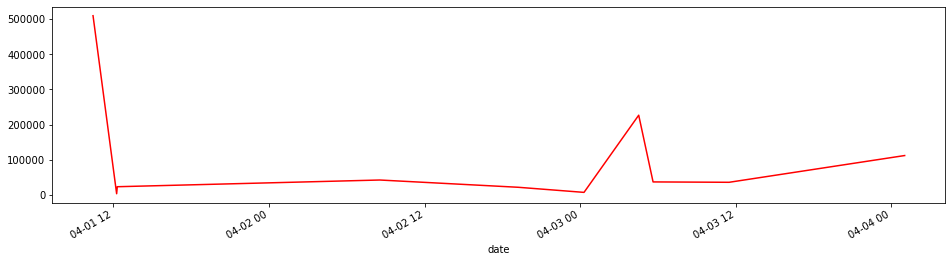

In [10]:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16,4),color='r')
plt.show()